#### EXP 1: Using suitable public domain dataset in UCI ML repository, apply different classification algorithms and compare the results. a. Naive Bayes Algorithm. b. SVM c. Decision Tree d. k-Nearest neighbor classification

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Loading and Preparing the Iris Dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']
(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}


Model Name: K-Nearest Neighbors
Accuracy: 91.1111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.85      0.94      0.89        18
           2       0.93      0.87      0.90        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.92        45
weighted avg       0.92      0.91      0.91        45



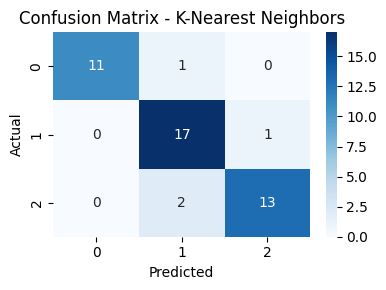


Model Name: Gaussian Naive Bayes
Accuracy: 93.3333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.94      0.92        18
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



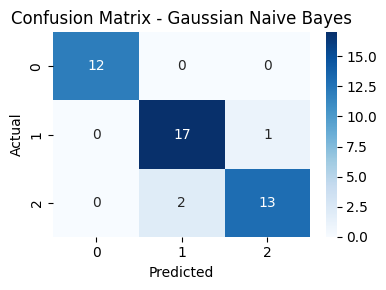


Model Name: Support Vector Machine
Accuracy: 95.5556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.90      1.00      0.95        18
           2       1.00      0.93      0.97        15

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



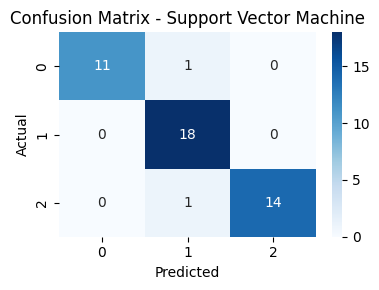


Model Name: Decision Tree
Accuracy: 95.5556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



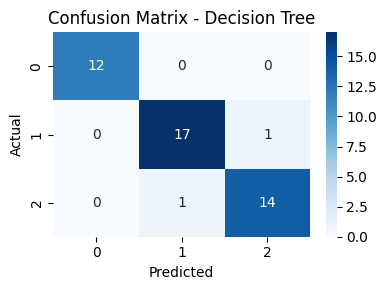

In [6]:
target_names = y.unique().astype(str)

for name, current_model in model.items():
    current_model.fit(X_train, y_train)     # Train the model
    y_pred = current_model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nModel Name: {name}")
    print("Accuracy:", round(acc*100, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()